# DSLabs functions

In [ ]:
# %run "scripts/dslabs_functions.py"
# may not work due to dependencies from python 3.9

# Data functions

In [ ]:
# %run "scripts/data_functions.py"
# may not work due to dependencies from python 3.9

# plot and eval functions
USE THIS INSTEAD OF data functions and dslabs functions

In [47]:
from matplotlib.axes import Axes
from matplotlib.pyplot import subplots, savefig
# from dslabs_functions import PAST_COLOR, FUTURE_COLOR, PRED_PAST_COLOR, PRED_FUTURE_COLOR, HEIGHT
from matplotlib.figure import Figure
from matplotlib.font_manager import FontProperties
from pandas import Series
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

from config import (
    ACTIVE_COLORS,
    LINE_COLOR,
    FILL_COLOR,
    PAST_COLOR,
    FUTURE_COLOR,
    PRED_PAST_COLOR,
    PRED_FUTURE_COLOR,
    cmap_blues,
)

NR_COLUMNS: int = 3
HEIGHT: int = 4

TEXT_MARGIN = 0.05
FONT_SIZE = 6
FONT_TEXT = FontProperties(size=FONT_SIZE)

alpha = 0.3

NR_STDEV: int = 2
IQR_FACTOR: float = 1.5

from typing import Union
from matplotlib.axes import Axes
from matplotlib.pyplot import subplots, savefig
from pandas import Series
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from numpy import arange, ndarray
from matplotlib.container import BarContainer
from matplotlib.pyplot import gca

# Define the mean_absolute_percentage_error function
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Define the plot_forecasting_series function
def plot_forecasting_series(
    trn: Series,
    tst: Series,
    prd_tst: Series,
    title: str = "",
    xlabel: str = "time",
    ylabel: str = "",
) -> Axes:
    fig, ax = subplots(1, 1, figsize=(4 * HEIGHT, HEIGHT), squeeze=True)
    fig.suptitle(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.plot(trn.index, trn.values, label="train", color=PAST_COLOR)
    ax.plot(tst.index, tst.values, label="test", color=FUTURE_COLOR)
    ax.plot(prd_tst.index, prd_tst.values, "--", label="test prediction", color=PRED_FUTURE_COLOR)
    ax.legend(prop={"size": 5})

    return ax



def set_chart_labels(ax: Axes, title: str = "", xlabel: str = "", ylabel: str = "") -> Axes:
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    return ax


# Define the plot_multibar_chart function
def plot_multibar_chart(
    group_labels: list,
    yvalues: dict,
    ax: Axes = None,  # type: ignore
    title: str = "",
    xlabel: str = "",
    ylabel: str = "",
    percentage: bool = False,
) -> Axes:
    if ax is None:
        ax = gca()
    ax = set_chart_labels(ax=ax, title=title, xlabel=xlabel, ylabel=ylabel)
    if percentage:
        ax.set_ylim(0.0, 1.0)
    bar_labels: list = list(yvalues.keys())

    # This is the location for each bar
    index: ndarray = arange(len(group_labels))
    bar_width: float = 0.8 / len(bar_labels)
    ax.set_xticks(index + bar_width / 2, labels=group_labels)

    for i in range(len(bar_labels)):
        bar_yvalues = yvalues[bar_labels[i]]
        values: BarContainer = ax.bar(
            index + i * bar_width,
            bar_yvalues,
            width=bar_width,
            label=bar_labels[i],
        )
        format = "%.2f" if percentage else "%.0f"
        ax.bar_label(values, fmt=format, fontproperties=FONT_TEXT)
        if any(y < 0 for y in bar_yvalues) and percentage:
            ax.set_ylim(-1.0, 1.0)
    ax.legend(fontsize="xx-small")
    return ax

# Define the FORECAST_MEASURES dictionary
FORECAST_MEASURES = {
    "MSE": mean_squared_error,
    "MAE": mean_absolute_error,
    "R2": r2_score,
    "MAPE": mean_absolute_percentage_error,
}

# Define the plot_forecasting_eval function
def plot_forecasting_eval(trn: Series, tst: Series, prd_trn: Series, prd_tst: Series, title: str = "") -> list[Axes]:
    ev1: dict = {
        "RMSE": [sqrt(FORECAST_MEASURES["MSE"](trn, prd_trn)), sqrt(FORECAST_MEASURES["MSE"](tst, prd_tst))],
        "MAE": [FORECAST_MEASURES["MAE"](trn, prd_trn), FORECAST_MEASURES["MAE"](tst, prd_tst)],
    }
    ev2: dict = {
        "MAPE": [FORECAST_MEASURES["MAPE"](trn, prd_trn), FORECAST_MEASURES["MAPE"](tst, prd_tst)],
        "R2": [FORECAST_MEASURES["R2"](trn, prd_trn), FORECAST_MEASURES["R2"](tst, prd_tst)],
    }

    # print(eval1, eval2)
    fig, axs = subplots(1, 2, figsize=(1.5 * HEIGHT, 0.75 * HEIGHT), squeeze=True)
    fig.suptitle(title)
    plot_multibar_chart(["train", "test"], ev1, ax=axs[0], title="Scale-dependent error", percentage=False)
    plot_multibar_chart(["train", "test"], ev2, ax=axs[1], title="Percentage error", percentage=True)
    return axs

# Load

In [41]:
import pandas as pd
import numpy as np


file_tag = "Google Merch Store 2024-2025"


test_data=True
# test_data=False


train=pd.read_csv(f"data/df_merch_0_2024_agg_time_final_train.csv", decimal=".",  index_col='Date', parse_dates=True,  infer_datetime_format=True)

test=pd.read_csv(f"data/df_merch_0_2024_agg_time_final_test.csv", decimal=".",  index_col='Date', parse_dates=True,  infer_datetime_format=True)

target='Sessions'

# # Prepare the training and testing data from dataframes with features and target
# trnX = train.drop(columns=[target])
# trnY = train[target]
# tstX = test.drop(columns=[target])
# tstY = test[target]


# from numpy import arange

# # Ensure no data leakage
# assert not set(train.index).intersection(set(test.index)), "Data leakage detected: Train and test sets overlap."


# # # Prepare the training and testing data using the time index as the feature
# trnX = arange(len(train)).reshape(-1, 1)
# trnY = train[target].to_numpy()
# tstX = arange(len(train), len(train+test)).reshape(-1, 1)
# tstY = test[target].to_numpy()

train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 331 entries, 2024-01-14 to 2024-12-09
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Seven-day active users           331 non-null    float64
 1   28-day active users              331 non-null    float64
 2   Events per session               331 non-null    float64
 3   Item view events                 331 non-null    float64
 4   Add to baskets                   331 non-null    float64
 5   Checkouts                        331 non-null    float64
 6   E-commerce purchases             331 non-null    float64
 7   Average purchase revenue         331 non-null    float64
 8   Purchase revenue                 331 non-null    float64
 9   First time purchasers            331 non-null    float64
 10  Average session duration         331 non-null    float64
 11  ARPU                             331 non-null    float64
 12  ARP

# LSTM Tensorflow Multivariate

## Tensorflow Data Prep

In [32]:

# Prepare the training and testing data from dataframes with features and target
trnX = train.drop(columns=[target])
trnY = train[target]
tstX = test.drop(columns=[target])
tstY = test[target]

# Convert the data to a format suitable for LSTM
def create_lstm_dataset(dataX, dataY, seq_length=1):
    X, y = [], []
    for i in range(len(dataX) - seq_length):
        X.append(dataX[i:(i + seq_length)].to_numpy())
        y.append(dataY[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # Example sequence length
trnX_lstm, trnY_lstm = create_lstm_dataset(trnX, trnY, seq_length)
tstX_lstm, tstY_lstm = create_lstm_dataset(tstX, tstY, seq_length)

print(f"Training data shape: {trnX_lstm.shape}, {trnY_lstm.shape}")
print(f"Testing data shape: {tstX_lstm.shape}, {tstY_lstm.shape}")


Training data shape: (321, 10, 51), (321,)
Testing data shape: (76, 10, 51), (76,)


# Tensorflow install instructions

1) Open Anaconda Terminal as Admin 

2) Create environment for tensorflow version 3.6-3.9

```bash 
conda create --name tf_env python=3.9
conda activate tf_env
```

3) Install ipykernel to run cells in jupyter as well as additional libraries for the analysis (pandas, numpy, matplotlib, sklearn, etc)

```bash
conda install -n tf_env ipykernel --update-deps --force-reinstall
conda install pandas matplotlib 
pip install scikit-learn
```

4) select the new env in VSC (tf_env) and test installation (should be version 2.10+)

```python
import tensorflow as tf
print(tf.__version__)
```

In [33]:
import tensorflow as tf
print(tf.__version__)

2.10.0


## Tensorflow Model Creation Multivariate

- great resource on YT: https://www.youtube.com/watch?v=94PlBzgeq90

In [34]:
import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model architecture

# model definition
model = tf.keras.models.Sequential()

# first layer
model.add(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(trnX_lstm.shape[1], trnX_lstm.shape[2])))

# second layer
model.add(tf.keras.layers.LSTM(64, return_sequences=False))

# third layer (dense)
model.add(tf.keras.layers.Dense(128, activation='relu'))    # 128 neurons, relu activation

# 4th layer (dropout)
model.add(tf.keras.layers.Dropout(0.2))

# output layer
model.add(tf.keras.layers.Dense(1, activation='linear'))    # 1 neuron, linear activation


model.summary()


# Compile the model
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mean_squared_error']
              )

# Train the model
history = model.fit(trnX_lstm, trnY_lstm, epochs=20, batch_size=32, validation_data=(tstX_lstm, tstY_lstm), verbose=1)

# Evaluate the model
loss = model.evaluate(tstX_lstm, tstY_lstm, verbose=0)
print(f'Test Loss: {loss}')

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 10, 64)            29696     
                                                                 
 lstm_18 (LSTM)              (None, 64)                33024     
                                                                 
 dense_8 (Dense)             (None, 128)               8320      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 71,169
Trainable params: 71,169
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
11/11 [==============================] 

## lstm predictions

3/3 [==============================] - 0s 3ms/step


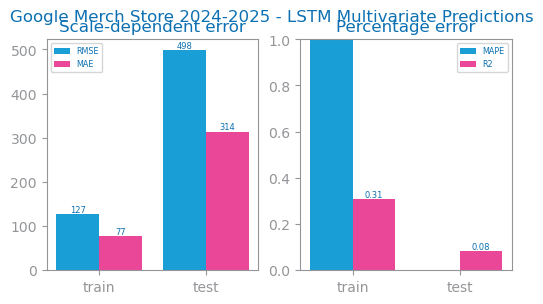

In [48]:

# Predict the training and testing data
prd_trn = Series(model.predict(trnX_lstm).flatten(), index=train.index[seq_length:])
prd_tst = Series(model.predict(tstX_lstm).flatten(), index=test.index[seq_length:])

# Plot the forecasting evaluation
plot_forecasting_eval(trnY[seq_length:], tstY[seq_length:], prd_trn, prd_tst, title=f"{file_tag} - LSTM Multivariate Predictions")
savefig(f"images/{file_tag}_LSTM_multivariate_predictions.png")

## Plot lstm tensorflow model multivariate

<Axes: xlabel='Date', ylabel='Sessions'>

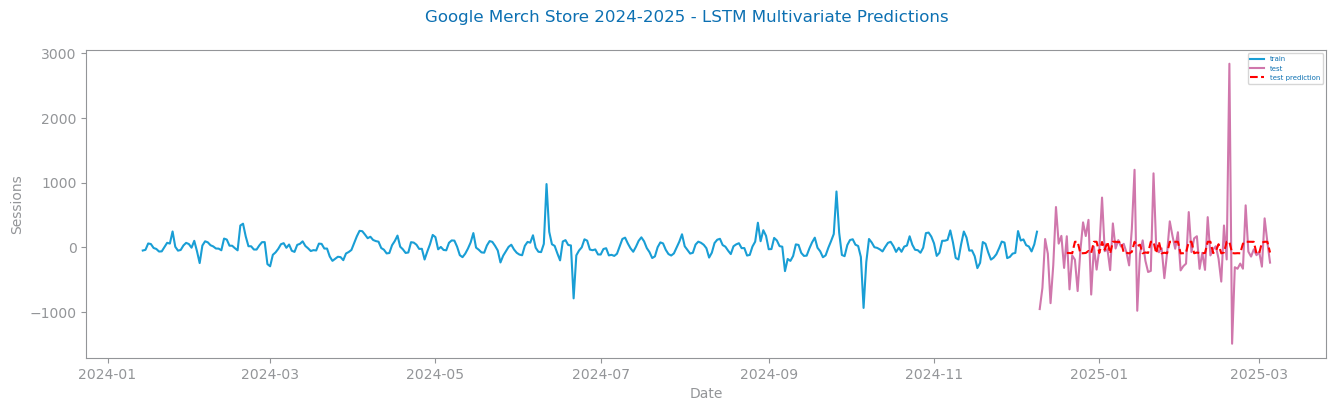

In [46]:
plot_forecasting_series(
    train[target],
    test[target],
    prd_tst,
    title=f"{file_tag} - LSTM Multivariate Predictions",
    xlabel='Date',
    ylabel=target,
)

# LSTM Tensorflow Univariate

# Tensorflow Univariate Data Prep

In [ ]:
# Prepare the training and testing data using the time index as the feature
trnX = arange(len(train)).reshape(-1, 1)
trnY = train[target].to_numpy()
tstX = arange(len(train), len(train+test)).reshape(-1, 1)
tstY = test[target].to_numpy()

# Convert the data to a format suitable for LSTM
def create_lstm_dataset(dataX, dataY, seq_length=1):
    X, y = [], []
    for i in range(len(dataX) - seq_length):
        X.append(dataX[i:(i + seq_length)])
        y.append(dataY[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # Example sequence length
trnX_lstm, trnY_lstm = create_lstm_dataset(trnX, trnY, seq_length)
tstX_lstm, tstY_lstm = create_lstm_dataset(tstX, tstY, seq_length)

print(f"Training data shape: {trnX_lstm.shape}, {trnY_lstm.shape}")
print(f"Testing data shape: {tstX_lstm.shape}, {tstY_lstm.shape}")

Training data shape: (321, 10, 1), (321,)
Testing data shape: (76, 10, 1), (76,)


## Tensorflow LSTM Univariate Model Creation

In [51]:
import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model architecture

# model definition
model = tf.keras.models.Sequential()

# first layer
model.add(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(trnX_lstm.shape[1], trnX_lstm.shape[2])))

# second layer
model.add(tf.keras.layers.LSTM(64, return_sequences=False))

# third layer (dense)
model.add(tf.keras.layers.Dense(128, activation='relu'))    # 128 neurons, relu activation

# 4th layer (dropout)
model.add(tf.keras.layers.Dropout(0.2))

# output layer
model.add(tf.keras.layers.Dense(1, activation='linear'))    # 1 neuron, linear activation


model.summary()


# Compile the model
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mean_squared_error']
              )

# Train the model
history = model.fit(trnX_lstm, trnY_lstm, epochs=20, batch_size=32, validation_data=(tstX_lstm, tstY_lstm), verbose=1)

# Evaluate the model
loss = model.evaluate(tstX_lstm, tstY_lstm, verbose=0)
print(f'Test Loss: {loss}')

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 10, 64)            16896     
                                                                 
 lstm_20 (LSTM)              (None, 64)                33024     
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 58,369
Trainable params: 58,369
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
11/11 [==============================]

## LSTM Tensorflow Univariate Predictions

3/3 [==============================] - 0s 0s/step


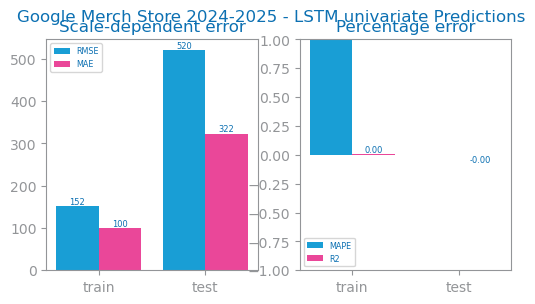

In [52]:

# Predict the training and testing data
prd_trn = Series(model.predict(trnX_lstm).flatten(), index=train.index[seq_length:])
prd_tst = Series(model.predict(tstX_lstm).flatten(), index=test.index[seq_length:])

# Plot the forecasting evaluation
plot_forecasting_eval(trnY[seq_length:], tstY[seq_length:], prd_trn, prd_tst, title=f"{file_tag} - LSTM univariate Predictions")
savefig(f"images/{file_tag}_LSTM_univariate_predictions.png")

## LSTM Tensorflow Univariate Plots

<Axes: xlabel='Date', ylabel='Sessions'>

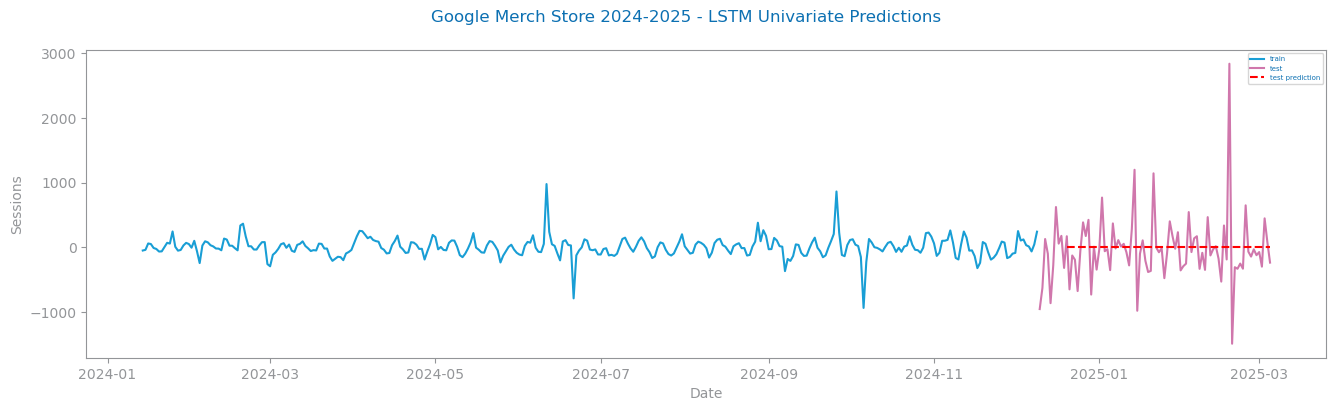

In [53]:
plot_forecasting_series(
    train[target],
    test[target],
    prd_tst,
    title=f"{file_tag} - LSTM Univariate Predictions",
    xlabel='Date',
    ylabel=target,
)